## ARIMA (AutoRegressive Interated Moving Average)を理解する

<補足>\
数式をLa Texを使用して記入する方法

https://qiita.com/namoshika/items/63db972bfd1030f8264a#%E5%90%84%E7%A8%AE%E8%A8%98%E5%8F%B7

ギリシャ文字とその英語読み

https://3040english.info/greek-alphabet/



### 0. 前提
Time Series Analysisにおいてデータは

1. Seasonal（年間１２か月の間に周期的に起こる）

2. Trend（１年を超える長い期間で起こる傾向）

3. Remaindar (1,2以外でランダムに起こる現象）

の３つに分離できる。

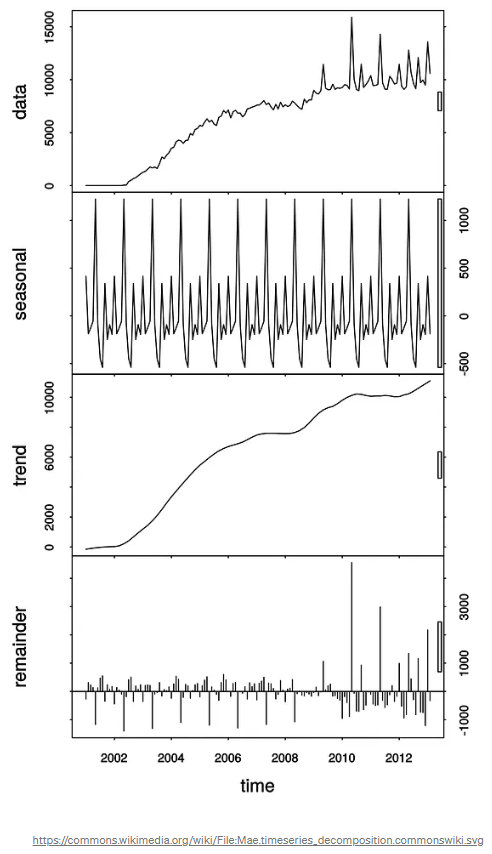

### 1. AR (AutoRegressive: 自己回帰）モデル：過去のデータを用いて現在の値を推定（回帰）するモデル
https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7

$$
y_t = \phi_0 + \phi_1 y_{t-1} + \epsilon_t\\
y_t: 時間tでの値\\
\phi_0: 定数項 (最小二乗法で求める）\\
\phi_1 y_{t-1}: {t-1}時点の値に重み付けしている（この重み付も最小二乗法で求める）\\
\epsilon_t: 攪乱項\\
$$



#### 一次ARの表記
$$
y_t = \phi_0 + \sum \limits_{n=1}^{p}\phi_n y_{t-n} + \epsilon_t\\
\sum \limits_{n=1}^{p}\phi_n y_{t-n}: t=1からn-1までのyに重みづけを掛けて足したもの
$$

※このモデルではtが進むにつれてyの値が拡散するかしないか（定常性: stationarity）が重要
$$
|\phi_1|<1:一次ARモデルは定常性を持つ　\\
|\phi_1|\geq1:一次ARモデルのy_tは発散する
$$

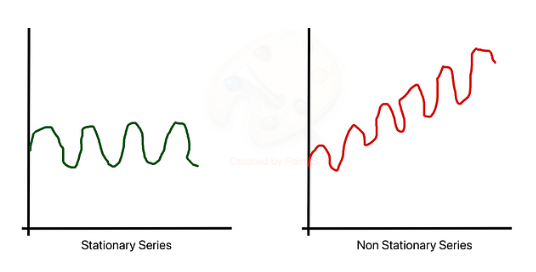

左の図：定常的なグラフ (stationary)

右の図：定常的でないグラフ (not stationary)

#### 定常性の検査
1. Rolling Statistics (rolling mean & rolling STD)

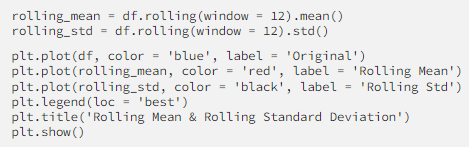
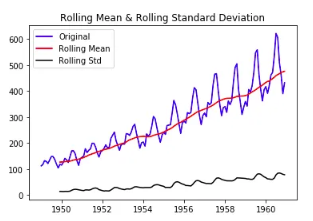

2. Augmented Dickery-Fuller test

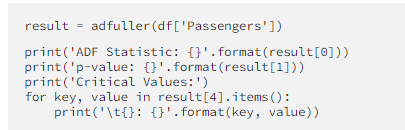
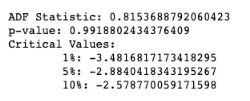

3. combination of the two (rolling statistics and ADF)

def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Passengers'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

4. Exponential Decay

    rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()\
    df_log_exp_decay = df_log - rolling_mean_exp_decay\
    df_log_exp_decay.dropna(inplace=True)\
    get_stationarity(df_log_exp_decay)

#### 一次ARモデルの特徴や統計量について

https://ai-trend.jp/basic-study/time-series-analysis/time-series-analysis-armodel_stats/

その他重要な概念：\
１．期待値\
２．分散\
３．自己共分散\
４．自己相関

### 2. MA (Moving Average: 移動平均モデル）
https://ai-trend.jp/basic-study/time-series-analysis/time-series-analysis-mamodel/

#### 一時MAの表記
$$
y_t = \theta_0 + \epsilon_t +\theta_1 \epsilon_{t-1}\\
\epsilon_t:ホワイトノイズ\\
\epsilon_tの分散: \delta^2\\
$$

MAモデルでは定常性について考える必要はないが、以下については理解する必要がある。
* 期待値
* 分散
* 自己共分散
* 自己相関


### 3. ARMA model (ARとMAを足したモデル）
https://ai-trend.jp/basic-study/time-series-analysis/arna_model/

$$
y_t = c + \sum \limits_{n=1}^{p}\phi_n y_{t-n} + \epsilon_t + \sum \limits_{n=1}^{q}\theta_n \epsilon_{t-n}
$$

### 4. ARIMA model
https://ai-trend.jp/basic-study/time-series-analysis/arima_model/

https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

* ARモデル と MAモデル に 差異項を加えたもの\
ARIMA (p,d,q)モデル
    * p: ARモデル項
    * d: 差異項
    * q: MAモデル項 


$$
y_t - y_{t-d} = c + \epsilon_t + \sum \limits_{i=1}^{p}\phi_n y_{t-i} + \epsilon_t + \sum \limits_{i=1}^{q}\theta_i \epsilon_{t-i}
$$

$y_t - y_{t-d}$ が定時的になるようにp, d, qを求める

もし時系列データにseasonal patternがある場合は、Sを入れてSARIMAモデルを作る必要がある。